Product 'Development Loan' has the best performance with Ksh. 477.00 in count.


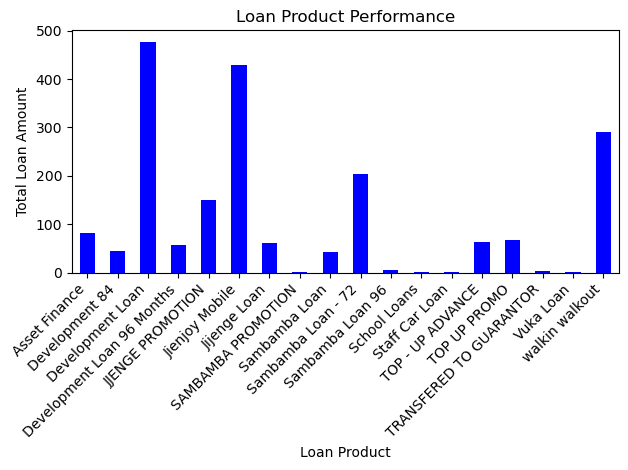

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to read and clean the CSV data
def load_data(filename):
  try:
    # Read the CSV file using pandas
    data = pd.read_csv(filename)
  except FileNotFoundError:
    print(f"Error: File '{filename}' not found!")
    return None

  # Check if required columns exist
  required_cols = ["product_name", "amount"]
  if not all(col in data.columns for col in required_cols):
    print(f"Error: The CSV file must contain columns 'product_name' and 'amount'.")
    return None

  # Convert 'amount' column to numeric (assuming currency values)
  data["amount"] = pd.to_numeric(data["amount"], errors='coerce')

  # Handle potential errors (missing values etc.) during conversion
  if data["amount"].isnull().any():
    print(f"Warning: Some values in 'amount' column could not be converted to numbers. These rows will be excluded.")
    data.dropna(subset=["amount"], inplace=True)

  return data


# Function to analyze and visualize product performance
def analyze_products(data,type_of_chart,type_of_operation):
  # Group data by product
  if type_of_operation == "count":
    grouped_data = data.groupby("product_name")["amount"].count()
  else:
    grouped_data = data.groupby("product_name")["amount"].sum()

  # Find the product with the highest total loan amount
  best_product = grouped_data.idxmax()
  best_amount = grouped_data.max()

  # Create a bar graph to visualize product performance
  if type_of_chart == "bar":
    grouped_data.plot(kind="bar", color="blue")
  else:
    if type_of_chart == "line":
      grouped_data.plot(kind="line", color="blue")
    else:
      if type_of_chart == "pie":
        grouped_data.plot(kind="pie")
  plt.xlabel("Loan Product")
  plt.ylabel("Total Loan Amount")
  plt.title("Loan Product Performance")
  plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
  plt.tight_layout()

  print(f"Product '{best_product}' has the best performance with {best_amount:.2f} in " +type_of_operation +".")
  plt.show()

# Get user input for the CSV file
filename = input("Enter the CSV file name (including extension): ")
#Get input from user on type of chart they want (Bar, Line, Pie etc)
type_of_chart = input("Which type of Chart do you want? \n"
     "Bar,"
     "Line,"
     "Pie,")
#Controls for data input for charts
if type_of_chart == "":
  type_of_chart = "bar"
#Get input from user on whether to count or sum the 
type_of_operation = input("Which operation do you want, Sum or Count \n")
#Controls to laod default sum if no input found
if type_of_operation =="":
  type_of_operation = "count"
# Load and analyze data
data = load_data(filename)
if data is not None:
  analyze_products(data,type_of_chart,type_of_operation)